# Walkthrough 3: Binary classification

## Context

This dataset includes measurements of Palmer penguins, along with what species of penguin they are. The idea is to classify whether the penguin is a Chinstrap, Gentoo, or Adélie.
<img src="penguins.png" alt="Penguins" width=500>  

The dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)  
- culmen_length_mm: culmen length (mm)  
- culmen_depth_mm: culmen depth (mm)  
- flipper_length_mm: flipper length (mm)  
- body_mass_g: body mass (g)  
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)  
- sex: penguin sex  

<img src="culmen_depth.png" alt="Penguins" width=400>

Artwork by @allison_horst  

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

## Reading the dataset

In [1]:
import numpy as np
import pandas as pd

penguins = pd.read_csv('penguins.csv')

We will remove the Chinstrap species for this excercise (unless you want to implement a Softmax regression). 

In [2]:
penguins = penguins[penguins['species'] != 'Chinstrap']

We will also remove the island and sex features/columns for this exercise.

In [3]:
penguins = penguins.drop(['island'], axis = 1)
penguins = penguins.drop(['sex'], axis = 1)

## Explore and clean up the data

# What we will do here

Evolve a solution that is a binary classifier of whether a penguin is a Chinstrap or Gentoo. Remember to check and explore the data before implementing your algorithm.

# Walkthrough

In [4]:
penguins.head(100)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
95,Adelie,40.8,18.9,208.0,4300.0
96,Adelie,38.1,18.6,190.0,3700.0
97,Adelie,40.3,18.5,196.0,4350.0
98,Adelie,33.1,16.1,178.0,2900.0


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   culmen_length_mm   274 non-null    float64
 2   culmen_depth_mm    274 non-null    float64
 3   flipper_length_mm  274 non-null    float64
 4   body_mass_g        274 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.9+ KB


In [6]:
penguins.species.value_counts()

Adelie    152
Gentoo    124
Name: species, dtype: int64

Looks like the dataset is already reasonably balanced between these two species, but not perfect. We probably don't need to resample here.

In [7]:
penguins = penguins.replace('Adelie',0).replace('Gentoo',1)
penguins = penguins.rename(columns={'species': 'target'})

In [8]:
penguins.describe(include='all')

,target,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,276.000000,274.000000,274.000000,274.000000,274.000000
mean,0.449275,42.702920,16.836131,202.178832,4318.065693
std,0.498324,5.195566,2.013410,15.047938,835.933105
min,0.000000,32.100000,13.100000,172.000000,2850.000000
25%,0.000000,38.350000,15.000000,190.000000,3600.000000
50%,0.000000,42.000000,17.000000,198.000000,4262.500000
75%,1.000000,46.675000,18.500000,215.000000,4950.000000
max,1.000000,59.600000,21.500000,231.000000,6300.000000


Check for missing data

In [9]:
penguins.isnull().sum()

target               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

Looks like there is missing data. We will use a simple imputation procedure to replace the missing data. Here, we only have numeric features and take a basic approach of replacing missing data with the mean of that measurement.

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
penguins.iloc[:,1:] = imputer.fit_transform(penguins.iloc[:,1:])

In [11]:
penguins.describe(include='all')

,target,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.449275,42.702920,16.836131,202.178832,4318.065693
std,0.498324,5.176639,2.006075,14.993118,832.887802
min,0.000000,32.100000,13.100000,172.000000,2850.000000
25%,0.000000,38.450000,15.000000,190.000000,3600.000000
50%,0.000000,42.050000,17.000000,198.500000,4287.500000
75%,1.000000,46.625000,18.500000,215.000000,4950.000000
max,1.000000,59.600000,21.500000,231.000000,6300.000000


In [1]:
import seaborn as sns
sns.boxplot(data=penguins.iloc[:,1:4], width=0.5)

ModuleNotFoundError: No module named 'seaborn'

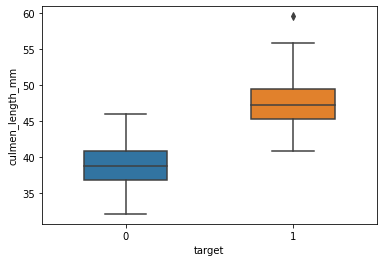

In [13]:
sns.boxplot(x="target", y="culmen_length_mm", data=penguins, width=0.5)

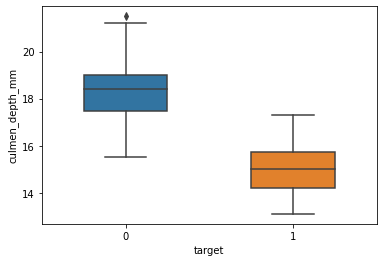

In [14]:
sns.boxplot(x="target", y="culmen_depth_mm", data=penguins, width=0.5)

Note that if you were going to include these figures in a report they would need tidying up first!

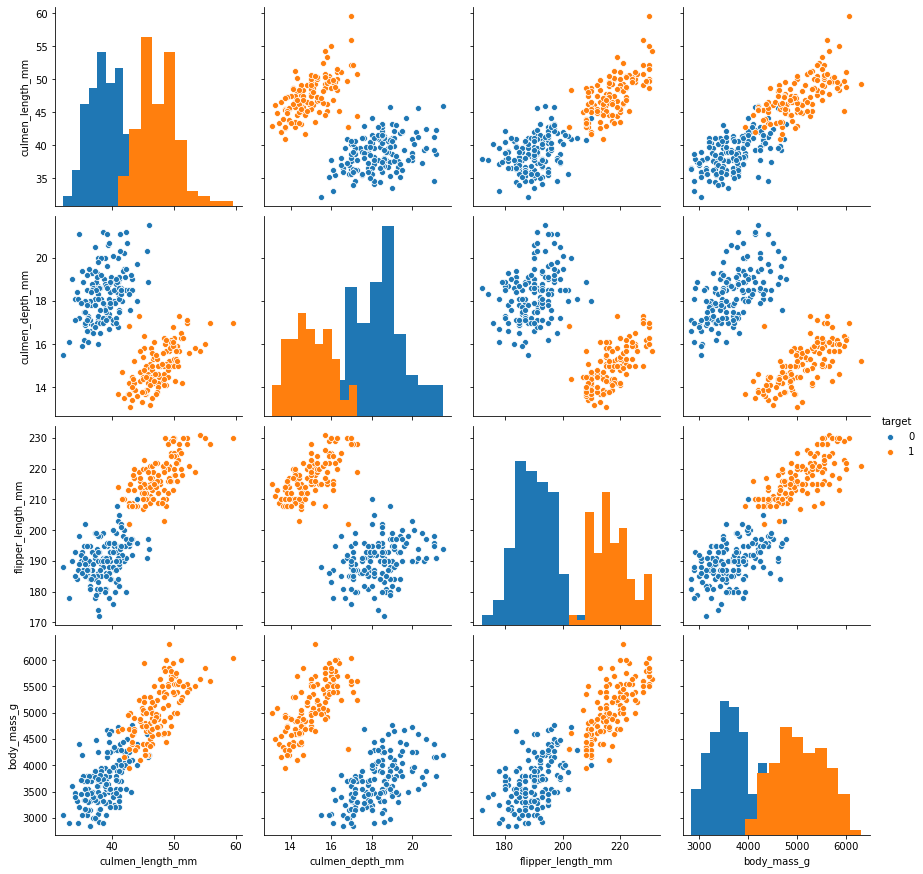

In [15]:
sns.pairplot(penguins, hue="target", height=3,diag_kind="hist")

## Prepare the data for our algorithm

Divide into target and features

In [16]:
X = penguins.drop(labels='target', axis=1)
y = penguins['target']

We now need to split into train and test sets. For this, we use a stratified split. This tries to keep the same ratio of each target category in the train and test sets. We're doing this because the dataset is small.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits = 1, test_size=0.3)
ss.get_n_splits(penguins)

for train_index, test_index in ss.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

In [18]:
y_train.value_counts()

0    106
1     87
Name: target, dtype: int64

In [19]:
y_test.value_counts()

0    46
1    37
Name: target, dtype: int64

You can see that the split keeps a similar ratio of each species in both the training and test sets.

# Evolutionary algorithm

In [34]:
from deap import base
from deap import creator
from deap import tools
import random

In [35]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [36]:
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

We need to decide on a representation for our individuals, and will use the GA to optimise a regression model. This means that an individual simply represents the weights with which to multiply the features.

For continuous features you can capture non-linearities. Which you can do e.g. using polynomials. Here, we will just keep it simple to illustrate the concept.

This means that we will need individuals to represent 1 weight for each of the four features in the dataset. It is also a good idea to add an intercept. Thus, individuals will have five genes.

We need to define a function that gives a classification for an individual, on a given row in the dataset. For that we use a logistic regression. However, because we want a first prediction (0 or 1) rather than probability, we could apply a threshold at 0.5, to make it a binary regression.

In [37]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction(individual,row):
    regr = individual[0] + sum(i * r for i , r in zip(individual[1:4], row ) )
    return( float(sigmoid(regr)) )

This represents the model:  

y = a + x1w1 + x2w2 + x3w3 + x4w4 + x5w5 + x1^2w6 + x2^2w7 + x3^2w8 + x4^2w9
y = (sigmoid(y) > 0.5)

Where a is the intercept xi is the feature/column and wi is the weight from the individual that we are evolving. 

In [38]:

def evalAccuracyTrain(individual, X_train, y_train):
    y_pred = [None] * X_train.shape[0]
    
    index = 0
    for i, row in X_train.iterrows():
        y_pred[index] = prediction(individual,row)
        index += 1
        
    # calculate mean squared difference (using the training set)
    diff = (np.array(y_pred) - np.array(y_train)) ** 2
    return( sum(diff), )

Normally logistic regression does not use mean squared error (commonly used in linear regression) because it makes the landscape have some local optima. However, this will be fine for this problem.

In [39]:
toolbox.register("evaluate", evalAccuracyTrain)

Let's test our evaluation function before we use it

In [40]:
import random
indv1 = [random.random() for iter in range(5)]

In [41]:
y_pred = [None] * penguins.shape[0]

In [42]:
prediction(indv1,X_train.iloc[50])

1.0

In [43]:
prediction(indv1,X_train.iloc[50]) > 0.5

True

Let's carry on with the GA

Now we register our operators. We are using a per-gene probability of mutation here, and we have 5 genes. So ba careful not to have mutation so high that you can almost always mutate an individual. You need to preserve some of what you have found.

In [30]:
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("select", tools.selTournament, tournsize=3)

In [31]:
NGEN, CXPB = 30, 0.2
pop = toolbox.population(n=200)

fitnesses = [toolbox.evaluate(ind, X_train, y_train) for ind in pop]
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [32]:
for g in range(NGEN):
    print("-- Generation %i --" % g)
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_inds = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(ind, X_train, y_train) for ind in invalid_inds]
    for ind, fit in zip(invalid_inds, fitnesses):
        ind.fitness.values = fit    
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    pop[:] = offspring

-- Generation 0 --
Best individual is [0.4180791605930314, 0.9852144717017195, 0.2953910411012355, -0.22335886845965658, 0.23256737858726617], (66.79418346770143,)
-- Generation 1 --
Best individual is [-0.38251745247870694, -0.08187472321558953, -0.9151754230486888, 0.07718636093969587, -0.9791908784413863], (51.74939366109166,)
-- Generation 2 --
Best individual is [-0.2710511298635834, 0.14409237606458436, -0.9909539668570004, 0.07042125554937351, 0.3246527671818835], (42.9626894076054,)
-- Generation 3 --
Best individual is [0.6773123391078035, 0.5671633115795442, -0.3922585057581609, -0.08470422656573218, 0.3625633631968814], (23.657978575515447,)
-- Generation 4 --
Best individual is [-0.5786523185974225, 0.20397969815309264, -0.7871389330086509, 0.01937397323150103, 0.23256737858726617], (4.987400951826698,)
-- Generation 5 --
Best individual is [0.32482140635338497, 0.012046825613196421, -1.0086025718473857, 0.07718636093969587, -0.40384458207410423], (2.4157871770329176,)
-- G

# Examine

In [33]:
from sklearn.metrics import accuracy_score

y_pred = [None] * X_test.shape[0]
index = 0
for i, row in X_test.iterrows():
    y_pred[index] = prediction(best_ind,row)
    index += 1

y_bin_pred = np.array(y_pred) > 0.5
accuracy = accuracy_score(y_test, y_bin_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 100.00%
